In [1]:
%config ZMQInteractiveShell.ast_node_interactivity = "all"
%pprint

Pretty printing has been turned OFF


以多项式函数拟合来试验模型复杂度和训练数据集大小对欠拟合和过拟合的影响

$$y = 1.2x - 3.4x^2 + 5.6x^3 + 5 + \epsilon$$

In [2]:
import sys
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.init as init
sys.path.append("../d2l_func/")
from model_train import train_experiment
from draw import set_fig_display

## 生成数据集

In [3]:
data_num = 100
true_w = torch.tensor([1.2, -3.4, 5.6]).view(-1, 1)
true_b = torch.tensor([5]).view(-1, 1)

# 训练集和测试集数据量都是100
torch.manual_seed(100)
# x = torch.randn(size=data_num*2, 1)
linear_feature = torch.normal(0, 1, size=(data_num*2, 1))
poly_feature = torch.cat((linear_feature, linear_feature**2, linear_feature**3), dim=1)
error = torch.normal(0, 0.01, size=(len(poly_feature), 1))
y = torch.mm(poly_feature, true_w) + true_b + error

In [4]:
# 看一下前两个数据样本
linear_feature[:2]
poly_feature[:2]
y[:2]

tensor([[0.1268],
        [1.3564]])

tensor([[1.2685e-01, 1.6091e-02, 2.0411e-03],
        [1.3564e+00, 1.8398e+00, 2.4955e+00]])

tensor([[ 5.0842],
        [14.3357]])

## 正常拟合

In [5]:
class PolyModel(nn.Module):
    def __init__(self, fea_num):
        super(PolyModel, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(fea_num, 1)
        )
        
    def forward(self, x):
        return self.layer(x)

Parameter containing:
tensor([[-0.0155,  0.0127, -0.0093]], requires_grad=True)

Parameter containing:
tensor([0.], requires_grad=True)

Epoch [1/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 910.3158, train_score: -, test_loss: 191.0725, test_score: -

Epoch [2/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 241.9207, train_score: -, test_loss: 65.3693, test_score: -

Epoch [3/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 76.9585, train_score: -, test_loss: 32.5119, test_score: -

Epoch [4/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 35.5458, train_score: -, test_loss: 23.2020, test_score: -

Epoch [5/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 24.5391, train_score: -, test_loss: 20.0668, test_score: -

Epoch [6/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 21.0864, train_score: -, test_loss: 18.6600, test_score: -

Epoch [7/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 19.5695, train_score: -, test_loss: 17.7986, test_score: -

Epoch [8/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 18.5976, train_sc

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 4.2917, train_score: -, test_loss: 4.4461, test_score: -

Epoch [65/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 4.1904, train_score: -, test_loss: 4.3431, test_score: -

Epoch [66/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 4.0915, train_score: -, test_loss: 4.2424, test_score: -

Epoch [67/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 3.9951, train_score: -, test_loss: 4.1442, test_score: -

Epoch [68/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 3.9009, train_score: -, test_loss: 4.0482, test_score: -

Epoch [69/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 3.8090, train_score: -, test_loss: 3.9545, test_score: -

Epoch [70/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 3.7194, train_score: -, test_loss: 3.8630, test_score: -

Epoch [71/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 3.6318, train_score: -, test_loss: 3.7737,

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.9772, train_score: -, test_loss: 1.0371, test_score: -

Epoch [128/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.9550, train_score: -, test_loss: 1.0138, test_score: -

Epoch [129/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.9333, train_score: -, test_loss: 0.9911, test_score: -

Epoch [130/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.9120, train_score: -, test_loss: 0.9689, test_score: -

Epoch [131/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.8913, train_score: -, test_loss: 0.9472, test_score: -

Epoch [132/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.8711, train_score: -, test_loss: 0.9260, test_score: -

Epoch [133/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.8513, train_score: -, test_loss: 0.9053, test_score: -

Epoch [134/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.8320, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.2371, train_score: -, test_loss: 0.2561, test_score: -

Epoch [191/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.2319, train_score: -, test_loss: 0.2506, test_score: -

Epoch [192/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.2269, train_score: -, test_loss: 0.2453, test_score: -

Epoch [193/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.2220, train_score: -, test_loss: 0.2400, test_score: -

Epoch [194/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.2172, train_score: -, test_loss: 0.2349, test_score: -

Epoch [195/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.2126, train_score: -, test_loss: 0.2299, test_score: -

Epoch [196/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.2080, train_score: -, test_loss: 0.2249, test_score: -

Epoch [197/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.2035, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0623, train_score: -, test_loss: 0.0677, test_score: -

Epoch [254/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0610, train_score: -, test_loss: 0.0663, test_score: -

Epoch [255/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0598, train_score: -, test_loss: 0.0650, test_score: -

Epoch [256/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0586, train_score: -, test_loss: 0.0637, test_score: -

Epoch [257/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0574, train_score: -, test_loss: 0.0624, test_score: -

Epoch [258/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0562, train_score: -, test_loss: 0.0611, test_score: -

Epoch [259/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0551, train_score: -, test_loss: 0.0599, test_score: -

Epoch [260/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0540, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0179, train_score: -, test_loss: 0.0192, test_score: -

Epoch [317/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0175, train_score: -, test_loss: 0.0189, test_score: -

Epoch [318/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0172, train_score: -, test_loss: 0.0185, test_score: -

Epoch [319/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0169, train_score: -, test_loss: 0.0182, test_score: -

Epoch [320/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0166, train_score: -, test_loss: 0.0178, test_score: -

Epoch [321/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0163, train_score: -, test_loss: 0.0175, test_score: -

Epoch [322/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0160, train_score: -, test_loss: 0.0171, test_score: -

Epoch [323/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0157, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0056, train_score: -, test_loss: 0.0059, test_score: -

Epoch [380/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0055, train_score: -, test_loss: 0.0057, test_score: -

Epoch [381/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0054, train_score: -, test_loss: 0.0056, test_score: -

Epoch [382/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0053, train_score: -, test_loss: 0.0055, test_score: -

Epoch [383/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0052, train_score: -, test_loss: 0.0054, test_score: -

Epoch [384/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0051, train_score: -, test_loss: 0.0053, test_score: -

Epoch [385/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0050, train_score: -, test_loss: 0.0052, test_score: -

Epoch [386/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0049, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0019, train_score: -, test_loss: 0.0019, test_score: -

Epoch [443/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0019, train_score: -, test_loss: 0.0019, test_score: -

Epoch [444/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0018, train_score: -, test_loss: 0.0018, test_score: -

Epoch [445/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0018, train_score: -, test_loss: 0.0018, test_score: -

Epoch [446/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0018, train_score: -, test_loss: 0.0018, test_score: -

Epoch [447/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0018, train_score: -, test_loss: 0.0017, test_score: -

Epoch [448/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0017, train_score: -, test_loss: 0.0017, test_score: -

Epoch [449/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0017, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0007, train_score: -, test_loss: 0.0007, test_score: -

Epoch [506/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0007, train_score: -, test_loss: 0.0007, test_score: -

Epoch [507/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0007, train_score: -, test_loss: 0.0006, test_score: -

Epoch [508/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0007, train_score: -, test_loss: 0.0006, test_score: -

Epoch [509/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0007, train_score: -, test_loss: 0.0006, test_score: -

Epoch [510/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0007, train_score: -, test_loss: 0.0006, test_score: -

Epoch [511/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0007, train_score: -, test_loss: 0.0006, test_score: -

Epoch [512/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0006, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0003, train_score: -, test_loss: 0.0003, test_score: -

Epoch [569/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0003, train_score: -, test_loss: 0.0003, test_score: -

Epoch [570/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0003, train_score: -, test_loss: 0.0003, test_score: -

Epoch [571/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0003, train_score: -, test_loss: 0.0003, test_score: -

Epoch [572/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0003, train_score: -, test_loss: 0.0003, test_score: -

Epoch [573/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0003, train_score: -, test_loss: 0.0003, test_score: -

Epoch [574/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0003, train_score: -, test_loss: 0.0002, test_score: -

Epoch [575/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0003, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0002, train_score: -, test_loss: 0.0001, test_score: -

Epoch [632/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0002, train_score: -, test_loss: 0.0001, test_score: -

Epoch [633/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0002, train_score: -, test_loss: 0.0001, test_score: -

Epoch [634/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0002, train_score: -, test_loss: 0.0001, test_score: -

Epoch [635/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0002, train_score: -, test_loss: 0.0001, test_score: -

Epoch [636/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0002, train_score: -, test_loss: 0.0001, test_score: -

Epoch [637/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0002, train_score: -, test_loss: 0.0001, test_score: -

Epoch [638/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0002, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [695/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [696/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [697/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [698/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [699/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [700/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [701/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [758/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [759/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [760/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [761/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [762/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [763/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [764/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [821/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [822/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [823/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [824/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [825/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [826/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [827/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [884/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [885/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [886/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [887/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [888/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [889/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [890/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [947/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [948/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [949/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [950/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [951/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [952/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 0.0001, test_score: -

Epoch [953/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 0.0001, train_score: -, test_loss: 

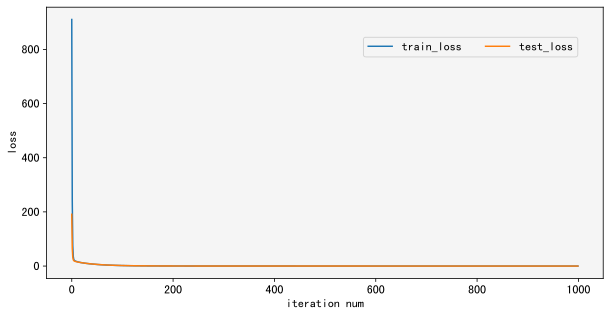

execute time is 4.476 seconds


In [6]:
# define model and loss
model = PolyModel(poly_feature.shape[1])
init.normal_(model.layer[0].weight, 0, 0.01)
init.constant_(model.layer[0].bias, 0)
loss = nn.MSELoss()

# deal with data
train_dataset = Data.TensorDataset(poly_feature[:100], y[:100])
test_dataset = Data.TensorDataset(poly_feature[100:], y[100:])
test_iter = Data.DataLoader(test_dataset, batch_size=len(y[:100]), shuffle=True)

params = {
    "model": model,
    "loss": loss,
    "epoch_num": 1000,
    "batch_size": 100,
    "lr": 0.01,
    "data_num": 100,
    "test_iter":test_iter,
    "draw": True,
}

# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=params["lr"])
train_iter = Data.DataLoader(train_dataset, batch_size=params["batch_size"], shuffle=True)
params["optimizer"] = optimizer
params["train_iter"] = train_iter

# training
set_fig_display()
train_experiment(**params)

In [7]:
model.layer[0].weight
model.layer[0].bias

Parameter containing:
tensor([[ 1.1989, -3.4003,  5.6000]], requires_grad=True)

Parameter containing:
tensor([5.0015], requires_grad=True)

## 欠拟合

Parameter containing:
tensor([[0.0096]], requires_grad=True)

Parameter containing:
tensor([0.], requires_grad=True)

Epoch [1/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 905.8680, train_score: -, test_loss: 664.8123, test_score: -

Epoch [2/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 879.6163, train_score: -, test_loss: 645.0322, test_score: -

Epoch [3/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 854.6152, train_score: -, test_loss: 626.2202, test_score: -

Epoch [4/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 830.8053, train_score: -, test_loss: 608.3298, test_score: -

Epoch [5/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 808.1296, train_score: -, test_loss: 591.3165, test_score: -

Epoch [6/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 786.5338, train_score: -, test_loss: 575.1379, test_score: -

Epoch [7/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 765.9666, train_score: -, test_loss: 559.7540, test_score: -

Epoch [8/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 746.37

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 382.4096, train_score: -, test_loss: 284.7973, test_score: -

Epoch [63/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 381.0628, train_score: -, test_loss: 284.0016, test_score: -

Epoch [64/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 379.7797, train_score: -, test_loss: 283.2506, test_score: -

Epoch [65/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 378.5572, train_score: -, test_loss: 282.5422, test_score: -

Epoch [66/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 377.3929, train_score: -, test_loss: 281.8740, test_score: -

Epoch [67/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 376.2835, train_score: -, test_loss: 281.2441, test_score: -

Epoch [68/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 375.2267, train_score: -, test_loss: 280.6505, test_score: -

Epoch [69/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 374.2200, trai

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 355.4089, train_score: -, test_loss: 272.6664, test_score: -

Epoch [124/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 355.3383, train_score: -, test_loss: 272.6818, test_score: -

Epoch [125/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 355.2709, train_score: -, test_loss: 272.6984, test_score: -

Epoch [126/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 355.2068, train_score: -, test_loss: 272.7159, test_score: -

Epoch [127/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 355.1456, train_score: -, test_loss: 272.7342, test_score: -

Epoch [128/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 355.0874, train_score: -, test_loss: 272.7534, test_score: -

Epoch [129/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 355.0317, train_score: -, test_loss: 272.7733, test_score: -

Epoch [130/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 354.978

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9808, train_score: -, test_loss: 273.9493, test_score: -

Epoch [185/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9770, train_score: -, test_loss: 273.9647, test_score: -

Epoch [186/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9733, train_score: -, test_loss: 273.9799, test_score: -

Epoch [187/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9698, train_score: -, test_loss: 273.9948, test_score: -

Epoch [188/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9665, train_score: -, test_loss: 274.0094, test_score: -

Epoch [189/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9633, train_score: -, test_loss: 274.0237, test_score: -

Epoch [190/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9603, train_score: -, test_loss: 274.0378, test_score: -

Epoch [191/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.957

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9022, train_score: -, test_loss: 274.5109, test_score: -

Epoch [246/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9020, train_score: -, test_loss: 274.5155, test_score: -

Epoch [247/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9018, train_score: -, test_loss: 274.5201, test_score: -

Epoch [248/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9016, train_score: -, test_loss: 274.5244, test_score: -

Epoch [249/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9015, train_score: -, test_loss: 274.5287, test_score: -

Epoch [250/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9012, train_score: -, test_loss: 274.5331, test_score: -

Epoch [251/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.9011, train_score: -, test_loss: 274.5371, test_score: -

Epoch [252/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.900

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8976, train_score: -, test_loss: 274.6697, test_score: -

Epoch [307/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8977, train_score: -, test_loss: 274.6710, test_score: -

Epoch [308/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8977, train_score: -, test_loss: 274.6722, test_score: -

Epoch [309/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8976, train_score: -, test_loss: 274.6734, test_score: -

Epoch [310/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8976, train_score: -, test_loss: 274.6746, test_score: -

Epoch [311/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8976, train_score: -, test_loss: 274.6757, test_score: -

Epoch [312/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8976, train_score: -, test_loss: 274.6768, test_score: -

Epoch [313/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8975, train_score: -, test_loss: 274.7125, test_score: -

Epoch [368/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7128, test_score: -

Epoch [369/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7131, test_score: -

Epoch [370/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7134, test_score: -

Epoch [371/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7137, test_score: -

Epoch [372/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7141, test_score: -

Epoch [373/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7144, test_score: -

Epoch [374/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8975, train_score: -, test_loss: 274.7239, test_score: -

Epoch [429/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7240, test_score: -

Epoch [430/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7242, test_score: -

Epoch [431/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8975, train_score: -, test_loss: 274.7242, test_score: -

Epoch [432/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7243, test_score: -

Epoch [433/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7244, test_score: -

Epoch [434/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7245, test_score: -

Epoch [435/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7271, test_score: -

Epoch [490/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7272, test_score: -

Epoch [491/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7272, test_score: -

Epoch [492/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7272, test_score: -

Epoch [493/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7272, test_score: -

Epoch [494/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7272, test_score: -

Epoch [495/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7273, test_score: -

Epoch [496/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7280, test_score: -

Epoch [551/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7280, test_score: -

Epoch [552/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7281, test_score: -

Epoch [553/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7281, test_score: -

Epoch [554/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7281, test_score: -

Epoch [555/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7281, test_score: -

Epoch [556/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7281, test_score: -

Epoch [557/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7282, test_score: -

Epoch [612/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7282, test_score: -

Epoch [613/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7282, test_score: -

Epoch [614/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7282, test_score: -

Epoch [615/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7282, test_score: -

Epoch [616/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7282, test_score: -

Epoch [617/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7282, test_score: -

Epoch [618/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7282, test_score: -

Epoch [673/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7282, test_score: -

Epoch [674/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7282, test_score: -

Epoch [675/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7282, test_score: -

Epoch [676/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7282, test_score: -

Epoch [677/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7282, test_score: -

Epoch [678/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7282, test_score: -

Epoch [679/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [734/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7283, test_score: -

Epoch [735/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [736/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [737/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7283, test_score: -

Epoch [738/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [739/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7283, test_score: -

Epoch [740/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [795/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [796/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [797/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [798/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [799/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [800/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [801/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [856/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [857/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [858/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [859/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7283, test_score: -

Epoch [860/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7283, test_score: -

Epoch [861/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [862/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [917/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [918/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [919/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [920/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [921/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7283, test_score: -

Epoch [922/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [923/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [978/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7283, test_score: -

Epoch [979/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7283, test_score: -

Epoch [980/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [981/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8973, train_score: -, test_loss: 274.7283, test_score: -

Epoch [982/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [983/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.8974, train_score: -, test_loss: 274.7283, test_score: -

Epoch [984/1000]
100/100 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 353.897

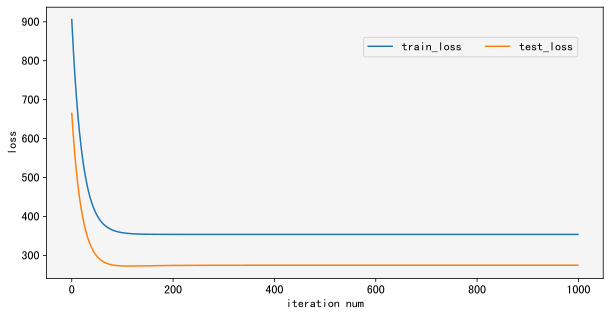

execute time is 4.351 seconds


In [8]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 1)
        )
    def forward(self, x):
        return self.layer(x)

# define model and loss
model = LinearModel()
init.normal_(model.layer[0].weight, 0, 0.01)
init.constant_(model.layer[0].bias, 0)
loss = nn.MSELoss()

# deal with data
train_dataset = Data.TensorDataset(linear_feature[:100], y[:100])
test_dataset = Data.TensorDataset(linear_feature[100:], y[100:])
test_iter = Data.DataLoader(test_dataset, batch_size=len(y[:100]), shuffle=True)

params = {
    "model": model,
    "loss": loss,
    "epoch_num": 1000,
    "batch_size": 100,
    "lr": 0.01,
    "data_num": 100,
    "test_iter":test_iter,
    "draw": True,
}

# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=params["lr"])
train_iter = Data.DataLoader(train_dataset, batch_size=params["batch_size"], shuffle=True)
params["optimizer"] = optimizer
params["train_iter"] = train_iter

# training
set_fig_display()
train_experiment(**params)

使用单个特征的线性模型来拟合，迭代多轮后，误差仍然非常大

## 过拟合

即使用数据生成模型同阶的三阶多项式函数模型，如果训练样本不足，该模型依然容易过拟合
- 只使用两个样本来训练模型

Parameter containing:
tensor([[ 0.0227,  0.0167, -0.0017]], requires_grad=True)

Parameter containing:
tensor([0.], requires_grad=True)

Epoch [1/10]
2/2 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 113.1013, train_score: -, test_loss: 614.8608, test_score: -

Epoch [2/10]
2/2 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 66.0653, train_score: -, test_loss: 498.7602, test_score: -

Epoch [3/10]
2/2 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 39.5900, train_score: -, test_loss: 393.1441, test_score: -

Epoch [4/10]
2/2 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 24.5065, train_score: -, test_loss: 373.2470, test_score: -

Epoch [5/10]
2/2 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 16.0839, train_score: -, test_loss: 340.1553, test_score: -

Epoch [6/10]
2/2 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 11.2736, train_score: -, test_loss: 317.7139, test_score: -

Epoch [7/10]
2/2 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 8.4919, train_score: -, test_loss: 295.5863, test_score: -

Epoch [8/10]
2/2 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] - train_loss: 6.8201, train_score: -, test_loss: 286.7379, test_score: -

E

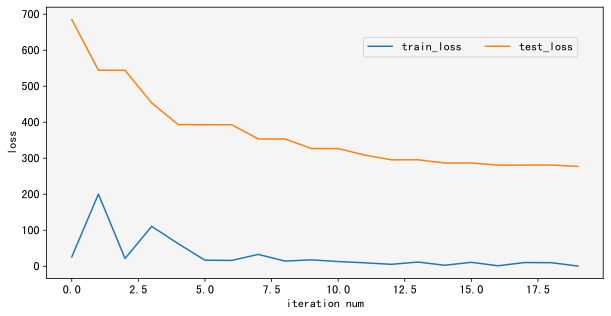

execute time is 0.222 seconds


In [9]:
# define model and loss
model = PolyModel(poly_feature.shape[1])
init.normal_(model.layer[0].weight, 0, 0.01)
init.constant_(model.layer[0].bias, 0)
loss = nn.MSELoss()

# deal with data
train_dataset = Data.TensorDataset(poly_feature[:2], y[:2])
test_dataset = Data.TensorDataset(poly_feature[100:], y[100:])
test_iter = Data.DataLoader(test_dataset, batch_size=len(y[:100]), shuffle=True)

params = {
    "model": model,
    "loss": loss,
    "epoch_num": 10,
    "batch_size": 1,
    "lr": 0.01,
    "data_num": 2,
    "test_iter":test_iter,
    "draw": True,
}

# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=params["lr"])
train_iter = Data.DataLoader(train_dataset, batch_size=params["batch_size"], shuffle=True)
params["optimizer"] = optimizer
params["train_iter"] = train_iter

# training
set_fig_display()
train_experiment(**params)

可以看见，虽然训练样本的误差很低，但是测试误差却是很高，这是典型的过拟合

因此，降低训练误差不一定意味着泛化误差一定会降低，机器学习模型应该关注降低泛化误差
- 可以使用验证集来进行模型的选择
- 欠拟合指的是无法得到较低的训练误差
- 过拟合是模型的训练误差远小于测试集上的误差
- 偏差-方差的trade-off